In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

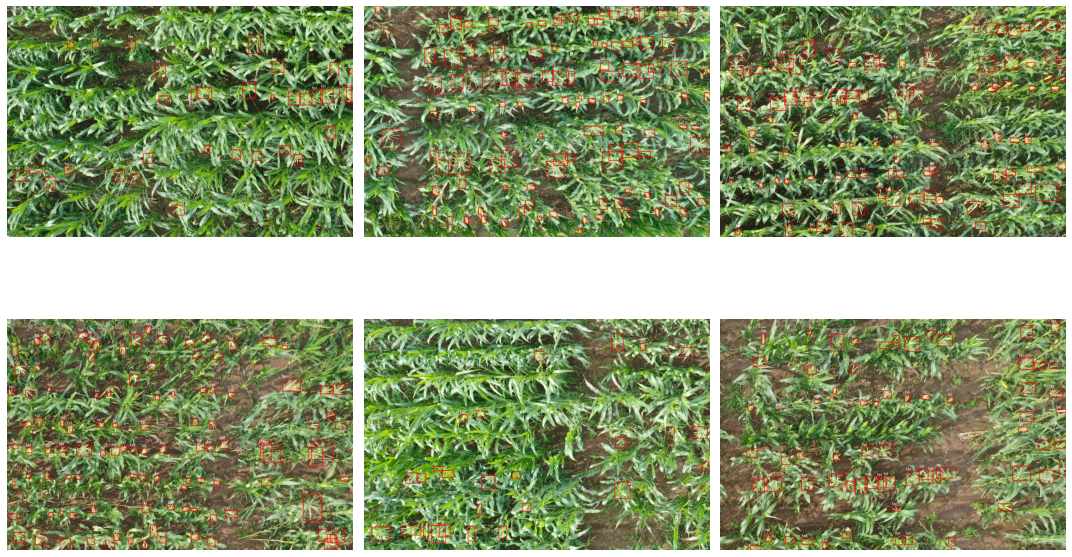

In [7]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [8]:
model = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:01<00:00, 14.2MB/s]


In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=First_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 5.35M/5.35M [00:00<00:00, 15.6MB/s]


AMP: checks passed ✅


train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<00:00, 1103.01it/s]

train: New cache created: /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache



val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<00:00, 1137.85it/s]

val: New cache created: /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache


Plotting labels to YOLO11s/First_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO11s/First_try
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      5.85G      4.756      3.566      1.954        530        416: 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all        124       7610     0.0452      0.106     0.0247    0.00595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      5.55G      3.079      1.751      1.079        581        416: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all        124       7610     0.0717      0.229     0.0539     0.0124


2025-04-13 17:17:46,365 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      5.56G      2.866      1.585       1.03        308        416: 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all        124       7610      0.161      0.411       0.14     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80       6.1G      2.757      1.522      1.008        448        416: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        124       7610      0.235      0.343      0.157     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      5.22G      2.742      1.507     0.9961        431        416: 100%|██████████| 16/16 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all        124       7610      0.387      0.394      0.289      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      5.87G      2.653       1.45     0.9928        361        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all        124       7610      0.441      0.412      0.322     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.84G      2.623      1.435     0.9792        421        416: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all        124       7610       0.41      0.425      0.325     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      5.98G      2.633      1.424     0.9856        263        416: 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all        124       7610      0.385      0.408      0.286     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      5.88G      2.576      1.349     0.9782        502        416: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all        124       7610       0.47      0.467      0.366      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.78G       2.61       1.37     0.9655        537        416: 100%|██████████| 16/16 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        124       7610       0.48      0.427      0.379      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      6.54G      2.552      1.339     0.9671        621        416: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.529      0.448      0.421       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      5.72G      2.561      1.341     0.9614        761        416: 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all        124       7610      0.447      0.428      0.361      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      5.75G      2.583      1.339     0.9622        513        416: 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        124       7610      0.555      0.497      0.466      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      5.52G      2.511      1.307     0.9634        380        416: 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all        124       7610      0.616      0.535      0.544      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      5.54G      2.514      1.307     0.9578        413        416: 100%|██████████| 16/16 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all        124       7610      0.618      0.545      0.546      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      5.84G      2.516      1.316     0.9611        373        416: 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all        124       7610      0.589       0.53      0.494      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80       5.4G       2.51      1.304     0.9546        416        416: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610      0.663      0.534      0.561      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80       6.2G      2.467      1.286      0.958        428        416: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all        124       7610      0.634      0.541      0.549       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      5.59G      2.477      1.268     0.9548        558        416: 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all        124       7610      0.675      0.541      0.575      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      5.35G      2.495      1.294      0.952        644        416: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all        124       7610      0.661      0.545      0.565      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      5.04G      2.441      1.261     0.9548        733        416: 100%|██████████| 16/16 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all        124       7610      0.628      0.537      0.537      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      5.04G      2.442      1.253     0.9494        346        416: 100%|██████████| 16/16 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all        124       7610      0.651      0.545      0.561        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      6.07G       2.47      1.263     0.9476        555        416: 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        124       7610      0.575      0.503      0.491      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      6.05G      2.476      1.272     0.9573        535        416: 100%|██████████| 16/16 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all        124       7610      0.624      0.538      0.547      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80       6.3G      2.414      1.251     0.9625        441        416: 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all        124       7610      0.641      0.543      0.561      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      5.34G      2.427      1.243     0.9461        501        416: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all        124       7610      0.662      0.568      0.582      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      5.15G      2.412      1.226     0.9506        318        416: 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all        124       7610      0.665      0.547      0.585      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80         5G      2.415      1.216     0.9485        736        416: 100%|██████████| 16/16 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all        124       7610      0.611      0.489      0.524      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80       5.7G      2.388      1.217     0.9443        482        416: 100%|██████████| 16/16 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all        124       7610      0.653      0.548      0.572        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      6.14G      2.411       1.22      0.941        602        416: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610      0.665      0.545      0.582      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      5.26G       2.37      1.205     0.9468        406        416: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all        124       7610      0.655      0.559      0.584      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      4.97G       2.38      1.197     0.9429        446        416: 100%|██████████| 16/16 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all        124       7610      0.596      0.512      0.499       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      5.27G      2.375      1.203     0.9425        422        416: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        124       7610      0.616      0.534      0.556      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      6.34G       2.41       1.22     0.9407        440        416: 100%|██████████| 16/16 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all        124       7610      0.543      0.498       0.47      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      5.98G      2.398      1.214     0.9466        743        416: 100%|██████████| 16/16 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all        124       7610      0.657      0.556      0.577      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      6.55G      2.378      1.205     0.9384        361        416: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all        124       7610       0.66      0.538      0.572      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      6.34G      2.397      1.215     0.9382        412        416: 100%|██████████| 16/16 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all        124       7610      0.636      0.553      0.565      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      5.59G      2.366      1.191      0.946        442        416: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        124       7610      0.667      0.572      0.599      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      4.71G      2.353      1.178     0.9371        436        416: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all        124       7610      0.618      0.545      0.531      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      6.36G      2.363      1.184     0.9379        666        416: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all        124       7610      0.676      0.571      0.604      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      4.97G      2.372      1.189     0.9396        377        416: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all        124       7610      0.659      0.554      0.577      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      5.88G      2.387      1.212     0.9397        750        416: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all        124       7610      0.649      0.555      0.581      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      4.95G      2.358      1.178     0.9392        382        416: 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all        124       7610      0.692      0.587      0.625      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      5.29G      2.344      1.187     0.9424        379        416: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all        124       7610      0.667      0.564      0.601      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      5.56G      2.345      1.181     0.9354        420        416: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all        124       7610      0.665       0.57      0.591      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      5.37G      2.344      1.168     0.9345        458        416: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all        124       7610      0.636      0.531      0.555      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      5.93G      2.345      1.184     0.9392        337        416: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all        124       7610      0.655      0.544      0.575      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      5.16G      2.324      1.148      0.939        528        416: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all        124       7610      0.662      0.544      0.582        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      5.01G      2.343      1.172     0.9399        475        416: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all        124       7610      0.671      0.576      0.607      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80         5G      2.342      1.184     0.9369        559        416: 100%|██████████| 16/16 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all        124       7610       0.68      0.581      0.614      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      5.23G      2.328      1.147     0.9288        422        416: 100%|██████████| 16/16 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all        124       7610      0.615      0.523      0.535       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      5.28G      2.348      1.157     0.9394        533        416: 100%|██████████| 16/16 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610       0.68      0.561      0.604      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      6.04G      2.335      1.164     0.9362        414        416: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all        124       7610      0.653      0.558      0.573      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      4.87G      2.327       1.16     0.9377        562        416: 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all        124       7610      0.707      0.579      0.629      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      4.94G       2.32      1.157     0.9399        386        416: 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610      0.662      0.563      0.593      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80       5.7G      2.296       1.14      0.936        376        416: 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all        124       7610      0.663      0.569      0.603      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      5.74G      2.312      1.146     0.9306        625        416: 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all        124       7610      0.672      0.576       0.61      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80         5G      2.309      1.138     0.9273        465        416: 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all        124       7610      0.665      0.572      0.603      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80       5.8G      2.303      1.127     0.9319        332        416: 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.597      0.531      0.528       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      5.47G       2.32      1.152     0.9301        518        416: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all        124       7610      0.677       0.57      0.606      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      5.07G       2.31      1.141      0.939        361        416: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610      0.683      0.571      0.612      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80       5.4G      2.317      1.151     0.9344        441        416: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all        124       7610      0.709      0.592      0.638      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      5.34G      2.317       1.14     0.9305        515        416: 100%|██████████| 16/16 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all        124       7610      0.661      0.583      0.604      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      5.85G      2.329      1.149     0.9278        474        416: 100%|██████████| 16/16 [00:02<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all        124       7610      0.686      0.573       0.61      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      6.53G      2.267      1.107     0.9327        438        416: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all        124       7610      0.718       0.58      0.636       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      5.82G       2.28      1.126     0.9338        392        416: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all        124       7610      0.702      0.586      0.635      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      5.68G      2.322      1.148     0.9269        471        416: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all        124       7610        0.7      0.589       0.63      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      6.85G      2.305      1.125     0.9263        406        416: 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610      0.679      0.577      0.615      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      5.44G      2.291      1.129     0.9292        573        416: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all        124       7610      0.701       0.59      0.631      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      5.91G      2.259      1.101     0.9318        464        416: 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all        124       7610      0.681      0.575      0.612       0.21


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.78G      2.255      1.202     0.9451        309        416: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all        124       7610      0.711      0.589      0.637      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.32G      2.222      1.122     0.9413        266        416: 100%|██████████| 16/16 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610      0.701       0.58      0.631      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.28G      2.201      1.108     0.9385        165        416: 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all        124       7610      0.701      0.586      0.631      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.15G       2.18      1.082     0.9418        266        416: 100%|██████████| 16/16 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all        124       7610      0.685      0.574      0.617      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80       4.3G      2.215      1.098     0.9338        252        416: 100%|██████████| 16/16 [00:02<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all        124       7610      0.669      0.579      0.611      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.36G      2.191       1.09      0.934        336        416: 100%|██████████| 16/16 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all        124       7610      0.699       0.59      0.632      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      3.97G      2.187      1.089     0.9412        157        416: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all        124       7610      0.693      0.587      0.626      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      4.34G       2.19       1.07     0.9381        374        416: 100%|██████████| 16/16 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all        124       7610      0.694      0.585      0.627      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.19G      2.176      1.071     0.9376        363        416: 100%|██████████| 16/16 [00:02<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all        124       7610      0.688      0.584      0.623      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.03G       2.18      1.078     0.9371        247        416: 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all        124       7610      0.676      0.586      0.617      0.217



80 epochs completed in 0.087 hours.
Optimizer stripped from YOLO11s/First_try/weights/last.pt, 19.1MB
Optimizer stripped from YOLO11s/First_try/weights/best.pt, 19.1MB

Validating YOLO11s/First_try/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]


                   all        124       7610      0.712      0.589      0.638      0.237
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to YOLO11s/First_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd46b3ff0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

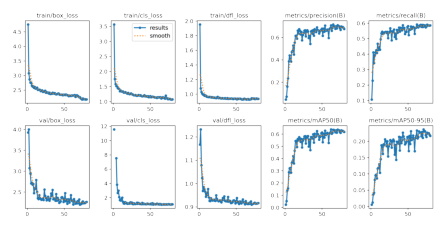

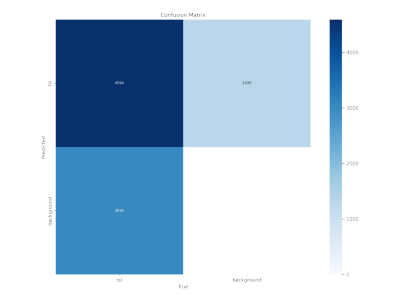

2025-04-13 17:23:07,852 - clearml.storage - INFO - Uploading: 18.26MB to YOLO11s/First_try/weights/best.pt


████████████████▉                55% | 10.00/18.26 MB [00:00<00:00, 41.69MB/s]: 

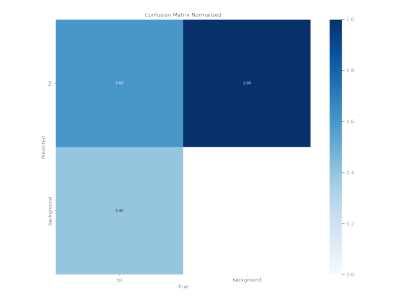

█████████████████████████▍       82% | 15.00/18.26 MB [00:00<00:00, 20.55MB/s]: 

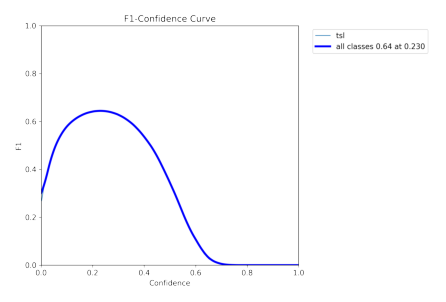

██████████████████████████████▉ 100% | 18.25/18.26 MB [00:00<00:00, 21.24MB/s]: 

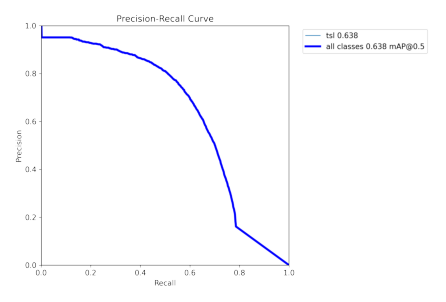

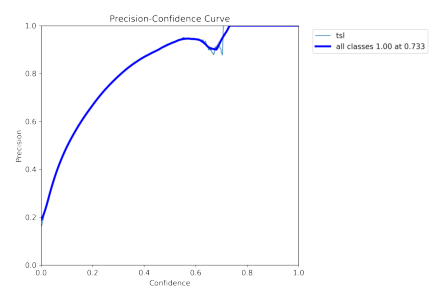

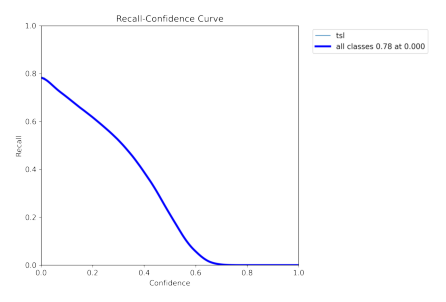

/home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.26/18.26 MB [00:01<00:00,  9.48MB/s]: 

2025-04-13 17:23:09,789 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/First_try.04b8cb2d8b7c486eb28f6652b437d7d1/models/best.pt


In [10]:
model.train(data='data.yaml ', epochs=80, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='First_try',
            batch=32, device=device, seed=69)

In [11]:
df = pd.read_csv('YOLO11s/First_try/results.csv')

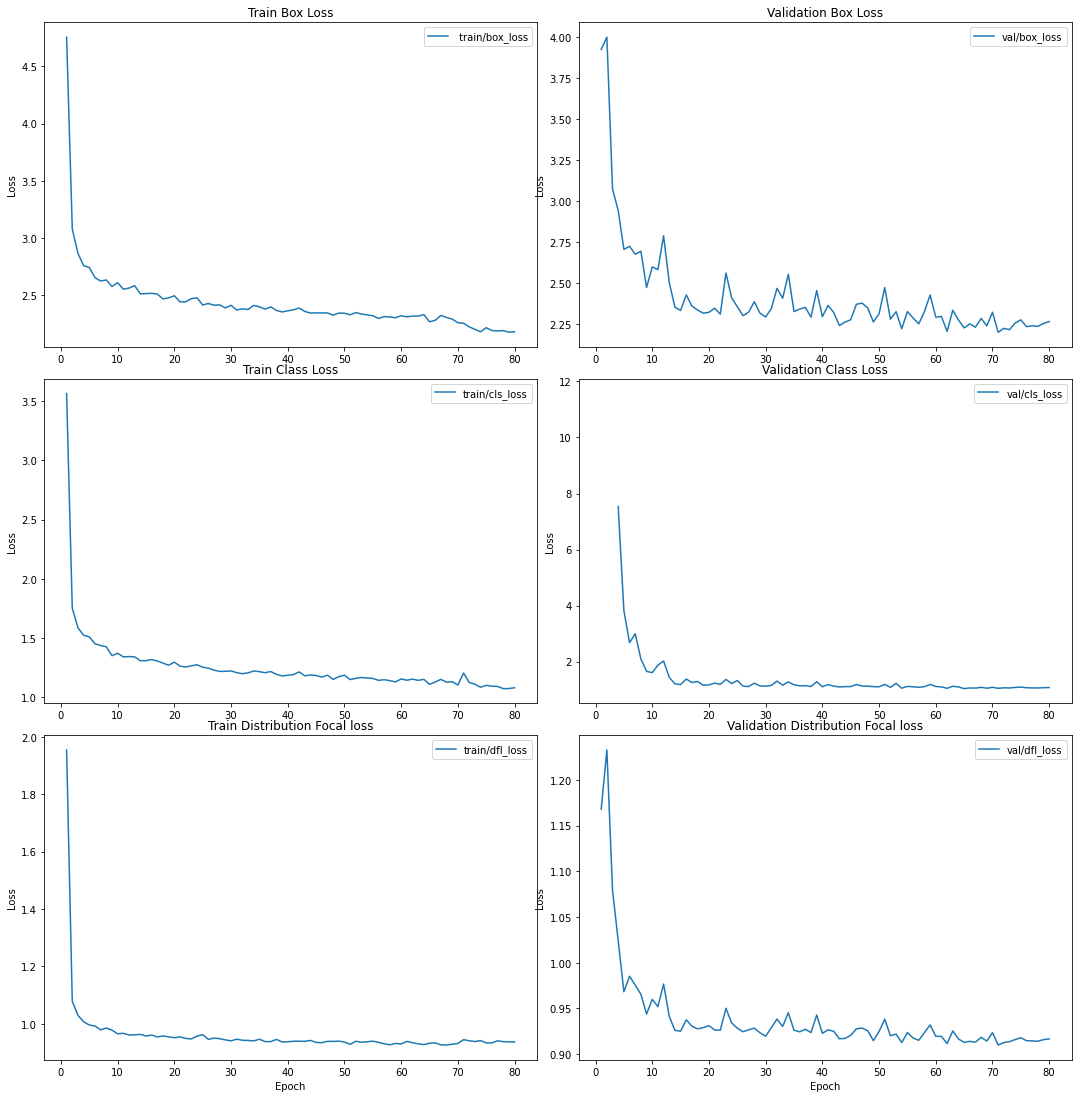

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

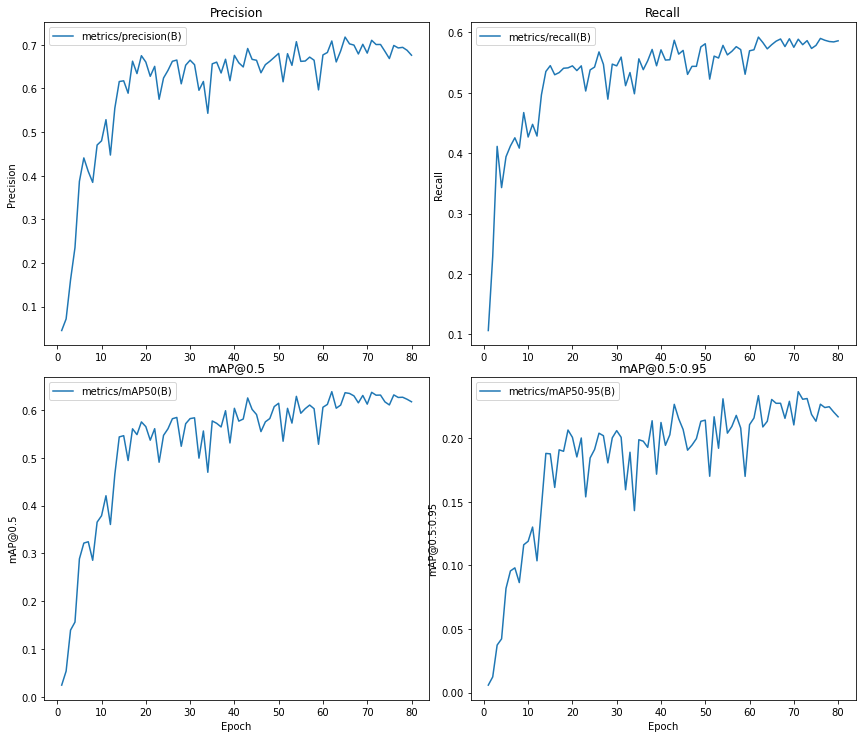

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

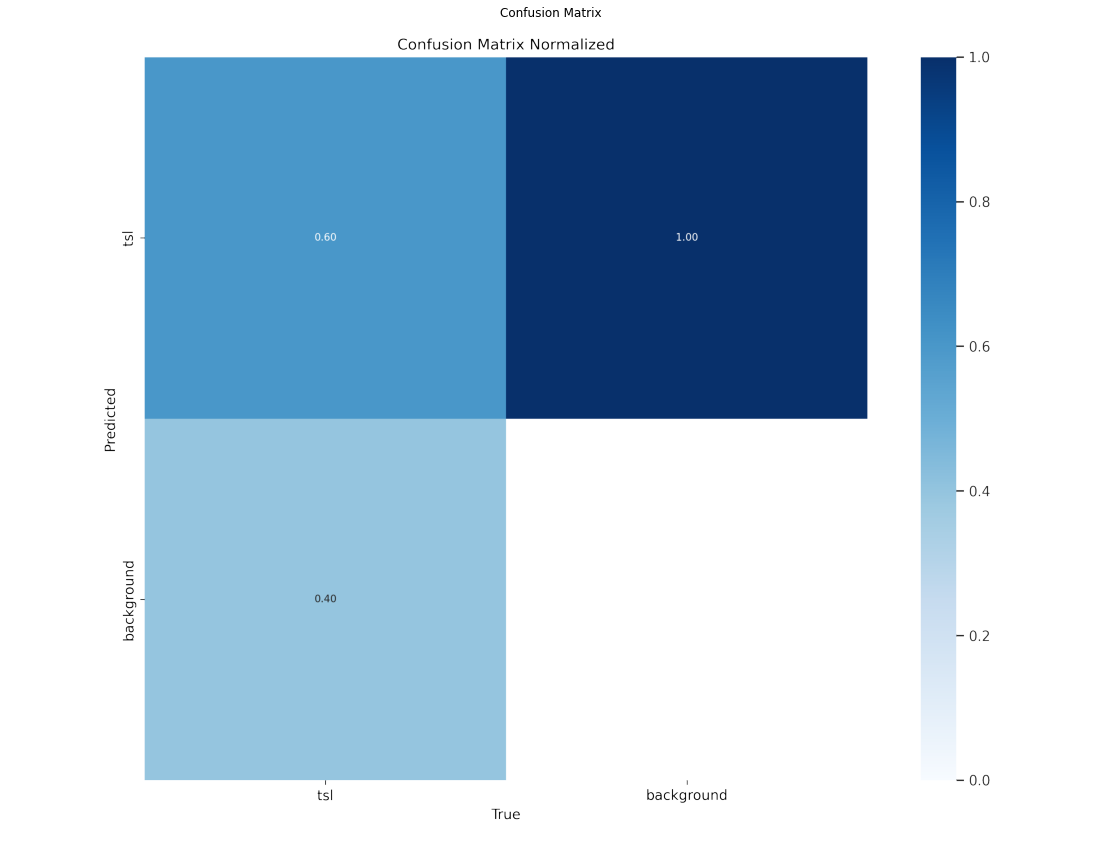

In [14]:
confusion_matrix = Image.open("YOLO11s/First_try/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Banana/test/images/DJI_0570_JPG_jpg.rf.cf1b6a3273eab7c2972dc8f1a7650bd5.jpg: 416x416 1 tsl, 10.1ms
Speed: 1.4ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


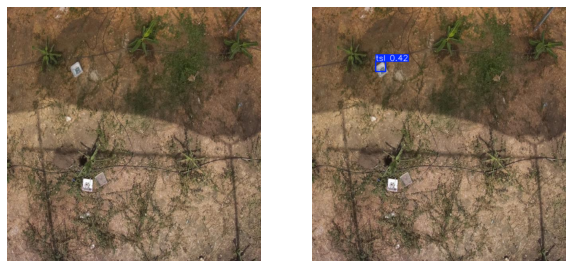

In [16]:
res = model('/home/user/CourseWork/datasets/Banana/test/images/DJI_0570_JPG_jpg.rf.cf1b6a3273eab7c2972dc8f1a7650bd5.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Banana/test/images/DJI_0570_JPG_jpg.rf.cf1b6a3273eab7c2972dc8f1a7650bd5.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();